### Defining the libraries functions and the measured data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import norm
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import signal
import math
import random
from sklearn.metrics import r2_score
from scipy.interpolate import UnivariateSpline
from scipy.stats import linregress

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Run2 AC,Ron s2i8 MRI FOV, XL ROI, detailed. Measured and Dimension Volume normalised
tpet2=np.array([ 175,  352,  356,  360,  364,  368,  372,  376,  380,  384,  388,  392, 396,  400,  404,  408,  412,  416,  420,  424,  428,  435,  445,  455,  465,  475,  540,  660,  780,  900, 1020, 1140, 1260, 1380, 1500, 1620,1740])#2.3 2n Run detailed: #length=[350,4,10,120]  #elements=[1,20,5,11]
bins2=np.array([350,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,  10,  10,  10,  10,  10, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120])
    #Min FoV (Different ROI)
Cpetin2=np.array([0.041671834,0.059479916,1.02499098,2.774721066,4.639065741,6.093023362,8.056990671,10.01288402,10.99001308,12.62786364,14.69468971,16.01722258,17.57511554,19.24231591,20.35608932,21.67369126,22.71827807,22.83542396,21.79109824,21.94159887,21.69409442,20.04361613,19.33936177,19.36757602,18.98807484,18.54155344,16.71438255,14.84590624,13.56826391,11.91092267,10.55218773,9.51679166,8.266270263,7.266240833,6.505621311,5.676114482,4.886080004,])
Cpetout2=np.array([0.036028487,0.050410354,0.048234813,0.046865217,0.043569873,0.042321064,0.053888783,0.05216482,0.052398636,0.057722029,0.091262715,0.189902764,0.360699503,0.548422304,0.763850759,1.031461596,1.410550373,1.795050666,2.281356757,2.750200593,3.272931196,3.744223553,4.531354557,5.002632898,5.245396742,5.312176462,5.153592059,4.759203525,4.377185356,3.935517167,3.553392078,3.203204509,2.904803374,2.590373439,2.316620509,2.096083278,1.809663896,])
Cpetref2=np.array([39.31307252,40.05936108,39.2097378,40.07053283,40.10208566,39.26151236,39.90955652,39.79156419,39.62920513,40.01780349,40.02420476,38.92573233,40.05627068,40.32811571,39.39929831,40.02059403,40.55092594,39.98773151,38.94735405,39.65703113,40.15071801,39.49714472,39.57471512,39.01877427,39.7377829,39.84135821,39.81012919,39.63234559,39.46151169,39.44547784,39.82062444,39.42982237,39.63655824,39.72527165,39.51500037,39.72386314,39.68732608,])# With guessed value. Don't really use
    #Max FoV (Different ROI)
Cpetin2f=np.array([0.040852776,0.041495506,1.003824176,2.777926613,4.572759349,6.261868839,7.985993449,9.753061352,11.34091752,13.16579809,14.74320569,15.81783132,17.61754461,19.13368775,20.28009164,21.84492724,22.76674641,22.8468759,22.01925317,21.91248744,21.07494567,20.20999249,19.53028599,19.1577879,18.98247253,18.55193746,16.9784183,15.09975156,13.33433908,12.08298715,10.60337836,9.326407828,8.28991348,7.36163783,6.382961516,5.641451912,4.927364349])
Cpetout2f=np.array([0.039360951,0.037741469,0.041659312,0.03822492,0.042291543,0.033441095,0.046198067,0.037899745,0.042042725,0.043150237,0.078747105,0.154178342,0.326045172,0.497952716,0.73161292,1.039016045,1.450454651,1.820855506,2.368956862,2.778800261,3.233806606,3.874914894,4.654226104,5.065851202,5.265326947,5.380381556,5.232409531,4.792982924,4.360941422,3.966478826,3.585599043,3.207422542,2.908973245,2.619402426,2.319706438,2.051444233,1.852547924])
Cpetref2f=np.array([36.19129758,35.81608779,35.21232322,36.40532237,36.61590811,35.9494772,37.40307178,37.1738464,36.85135513,37.74595033,38.33611123,37.69935077,38.51939557,38.94118517,38.00058597,38.8499146,39.29646426,39.02805509,38.60862497,38.84913631,39.32991049,39.21761072,38.90325951,38.83974066,38.5606797,39.10947102,38.89911936,38.74680143,38.60106851,38.19586883,37.95220522,37.83465264,37.79203338,37.58483313,37.41063325,37.41597234,36.94191865])

validationsample2=np.array([0.002603453,0.269924742,2.734383426,2.182952193,1.908158431,1.717281892,1.573417657,1.416990909,1.279202358,1.160962118,1.074066667,0.968595103,0.888561749]) #13 samples
sampleref2=191
samplecount2=13
q2=0.1    # n ml/m (it gets devided later on for the sake of the calculations)
Cref2=46.4131593302913 #shady value, missing some weight measurements of the ref vial (it is not curve fitting kinda weight )
#length2=[350,4,10,120]
#elements2=[1,20,5,11]
#peak2=416 three 4s bin after the peak

#Run3 AC,Ron s2i8 MRI FOV, XL ROI, detailed. Measured and Dimension Volume normalised
tpet3=np.array([190, 382,  386,  390,  394,  398,  405,  415,  425,  435,  442,  446, 450,  454,  458,  462,  466,  470,  474,  478,  510,  570, 630, 690,  780, 900, 1020, 1140, 1260, 1380, 1500, 1620, 1740]) #2.3 3n Run detailed:  #length=[380,4,10,4,60,120]     #elements=[1,5,4,10,4,9]
bins3=np.array([380,   4,   4,   4,   4,   4,  10,  10,  10,  10,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,  60,  60,  60,  60, 120, 120, 120, 120, 120, 120, 120, 120, 120])
    #Min FoV (Different ROI)
Cpetin3=np.array([0.067408854,0.069650561,0.131450727,0.167696782,0.296229731,0.515940908,1.209086352,3.004108572,5.855346863,9.551637666,12.28281362,13.43752622,15.19326291,16.81818527,18.07762127,19.87737075,21.01638723,21.16348151,21.32122486,20.97016212,19.02440716,17.85564186,17.40655777,16.27117353,15.54462339,14.32821312,13.315184,12.08582423,11.32374233,10.3802086,9.660574147,8.846879543,8.338217794]) # Volume normalised to dimensions
Cpetout3=np.array([0.033504973,0.03598186,0.038144509,0.041983489,0.033868511,0.036507139,0.035527233,0.035536133,0.03396738,0.046441688,0.077420516,0.112630026,0.180437452,0.279559722,0.40089593,0.569519033,0.767938261,1.019806094,1.293018485,1.567077575,2.844346284,3.47777752,3.639549868,3.56395362,3.576366791,3.320066953,3.16100959,2.943808621,2.729381164,2.538124742,2.404814727,2.221129444,2.042253415]) # Volume normalised to dimensions
Cpetref3=np.array([42.28804012,41.54942945,42.6739751,42.61586353,41.55434245,42.34843559,41.96136199,42.48594132,42.26126443,42.19074163,42.46180863,41.58247199,42.33815937,42.59387642,41.81837522,42.64986824,42.77143341,42.29989905,42.85224361,42.25734524,42.21365671,41.91637611,42.13216973,41.71676285,41.80284818,41.87850794,42.1136295,41.43371573,41.97905861,41.76863582,41.67197532,41.58880997,41.39368822]) #Volume normalised to measured weight
    #Max FoV (Different ROI)
Cpetin3f=np.array([0.071658998,0.063737007,0.095331645,0.150699856,0.267006368,0.481135936,1.203720463,3.089747171,5.930570948,9.444741799,12.31324585,13.37275442,15.40570137,16.94000199,18.09510604,19.77162031,21.16588199,20.97632306,21.44938788,20.93914902,19.11727106,18.24709281,17.67583196,16.80553958,15.52531489,14.34272722,13.34503722,12.38913398,11.52094425,10.50407279,9.71233633,8.840036175,8.230612412])
Cpetout3f=np.array([0.042459902,0.035561156,0.04073281,0.038211863,0.035580315,0.038521983,0.037387281,0.040534251,0.036812954,0.050542663,0.074792602,0.105145989,0.178784923,0.270112271,0.373898013,0.557118378,0.793748347,0.973268674,1.307343648,1.587112825,2.83561187,3.5379505,3.761784462,3.687843922,3.55774677,3.364528791,3.147897049,2.964636345,2.804868815,2.582848208,2.430975275,2.230989425,2.050975799])
Cpetref3f=np.array([39.25265024,37.91447354,38.9430652,39.03755009,37.6853151,38.56600364,38.60626141,39.35951299,39.47126642,40.05988747,40.67984335,40.24763223,41.45368577,41.37522681,41.05024365,42.07040766,41.57281371,40.97683103,42.40473973,41.65999996,41.96804474,41.60856683,42.32732917,41.86892944,41.73409066,41.53066853,41.26245069,41.66115006,41.06022045,41.01383938,40.48881491,40.74910343,40.33348381])

validationsample3=np.array([0.008697965,0.134054335,1.436748647,1.471984541,1.369800465,1.258063242,1.2061757,1.093652556,1.002883825,0.947969856,0.894704957,0.841317066,0.795495804,0.753371349,0.70611045])#15 samples
sampleref3=267
samplecount3=15
q3=0.1    # n ml/m (it gets devided later on for the sake of the calculations)
Cref3=48.0598192204452
#length3=[380,4,10,4,60,120]
#elements3=[1,5,4,10,4,9]  1:6 10:20, 20:24 24:33
#peak3=474 , one 4s bin after the peak

#Run4 AC,Ron s2i8 MRI FOV, XL ROI, detailed. Measured and Dimension Volume normalised (41 is used for paper)
tpet4=np.array([ 205,  412,  416,  420,  424,  428,  432,  436,  440,  444,  448,  452, 456,  460,  464,  468,  472,  476,  480,  484,  488,  495,  505,  515, 525,  535,  570,  660,  780,  900, 1020, 1140, 1260, 1380, 1500, 1620, 1740]) #2.3 4n Run detailed:  #length=[410,4,10,60,120]       #elements=[1,20,5,1,10]
bins4=np.array([410,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,  10,  10,  10,  10,  10,  60, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120])
    #Min FoV (Different ROI) og used for the paper
Cpetin41=np.array([2.168163538,3.628479356,4.272708374,4.921601331,5.916929132,7.278821348,8.231295804,9.668689176,10.94178632,12.45278568,13.96568867,15.25869663,16.35222441,17.77646606,19.20419049,20.58240363,20.02776922,20.67229739,19.9752056,19.80950172,19.8725498,19.17170144,18.69386716,18.39007176,18.43837074,17.99794822,17.19354875,16.32706605,15.03173561,13.8326156,12.64597376,11.70981119,10.91338666,10.01720979,9.316997255,8.607126614,7.749121611]) #Original reconstruction with wrong peak
Cpetout41=np.array([1.35994176,1.385633576,1.345634983,1.366500724,1.372138255,1.440684041,1.447093636,1.570359452,1.608204595,1.7517252,1.75175333,1.819433612,1.907072344,2.040343602,2.144288161,2.272157307,2.478476415,2.725835305,2.941388801,3.21173199,3.450864713,3.660081889,3.848112359,3.984675765,4.019074721,3.930708316,3.80902916,3.791666443,3.778759718,3.53281266,3.326362228,3.177624686,3.003266414,2.797406388,2.628164446,2.449544191,2.293861006,])
Cpetref41=np.array([32.8216371, 33.68873357,33.22522525,32.92987779,33.37197555,33.27206205,32.75873628,33.56235197,33.42037251,32.92351769,32.96546724,33.46362359,32.46082954,33.22046869,33.40722186,33.2633828,33.00966394,33.29297094,33.30496853,33.41563043,33.58228693,33.20865278,32.90247498,33.3288888,33.31824309,33.097842,32.89584147,32.71800819,33.55164145,32.83541621,32.80464882,33.03714107,32.88746434,32.9302232,33.08617505,32.61461064,32.89019768]) #legit reference from measred volumes
    #Repeated Min FoV (Different ROI)
Cpetin42=np.array([2.153757253,3.532085761,4.281798012,4.970722965,5.971408087,7.217639992,8.342210613,9.780912813,11.12423412,12.21266579,13.79659849,15.23366373,16.39308081,17.91727397,19.31744038,20.62435164,20.16604778,20.32227047,20.15862623,19.43015153,19.78521816,19.22318596,18.63661992,18.5502873,17.92261539,17.8696087,17.44186953,16.20852904,14.86655621,13.71041181,12.66018687,11.60912872,10.87045621,10.04222571,9.204686179,8.534136657,7.894432934]) # Second  reconstruction with good peak
Cpetout42=np.array([1.372577042,1.350769344,1.362382904,1.348799473,1.388676797,1.43478371,1.512025318,1.574861162,1.62113145,1.670935575,1.746972905,1.823249226,1.903320697,2.008498129,2.12136807,2.325622316,2.483978919,2.786060894,2.953431218,3.188875361,3.414868664,3.649633268,3.874755881,4.021544182,3.96498213,3.943682068,3.885852669,3.868759843,3.687311279,3.542583478,3.34560007,3.158932415,2.980124631,2.794782898,2.651228251,2.469603814,2.284239692])
Cpetref42=np.array([32.01229717,32.56381316,32.61947976,31.98590359,32.91574755,32.69993543,32.34787888,32.78587326,32.59908705,31.92991907,32.64390846,32.713318,31.90554261,32.57031007,32.971237,32.93787396,32.34772771,33.14099861,32.77731633,32.15586778,32.85979185,32.39914043,32.40178808,32.36227669,32.33859095,32.51153209,32.62246751,32.68232878,32.24102936,32.09698452,32.16110174,32.33454952,32.20180693,32.20664489,32.21818577,32.30788992,32.17718045])
    #Max FoV (Different ROI)
Cpetin4f=np.array([2.20130551,3.521394355,4.23615463,4.912098241,6.063947504,7.296143633,8.234924114,9.625537305,10.91218792,12.03602049,13.75653656,14.99232836,16.22063905,17.77857474,18.98480894,20.27256398,20.06007918,20.36222327,20.03535167,19.23031071,19.53962287,19.00554909,18.71745608,18.23396624,18.17901965,18.06748373,17.23519047,16.19982504,14.64286753,13.75579894,12.60701558,11.64513333,10.73113248,9.966084589,9.16623508,8.528488381,7.846335753])
Cpetout4f=np.array([1.385565145,1.321859031,1.328268441,1.339076839,1.353260778,1.404473727,1.434255124,1.547996236,1.564922675,1.656336304,1.725679474,1.787348594,1.880814616,2.030840446,2.139720354,2.296101,2.488321397,2.734085873,2.982307884,3.192819819,3.375416668,3.672511506,3.940748775,4.049075802,3.967567174,4.021146555,3.846572329,3.828971511,3.689910303,3.588642449,3.372010006,3.193482991,2.990794131,2.80376686,2.645384104,2.50617793,2.30004149])
Cpetref4f=np.array([30.86677837,30.76643578,30.9212955,30.5114037,31.16643158,31.37755716,30.89745234,31.97499927,32.00045254,31.53900277,32.28133838,32.24750394,32.00131015,32.72859589,32.99418804,32.88743035,32.31691855,33.25898133,32.70328691,32.12055799,32.65770841,32.52572802,32.54464574,32.87186432,32.48495958,32.83720777,32.48471601,32.83661279,32.44211769,32.46579865,32.21597816,32.10624136,31.94899718,31.95699864,31.97553767,31.87487771,31.51669615])

validationsample4=np.array([1.217296093,1.747527973,1.680552326,1.426967023,1.294768279,1.192986924,1.101194917,1.024173399,0.951313188,0.888357406,0.838799823,0.792954619,0.745333343,0.680716084]) #14 samples
sampleref4=258
samplecount4=14
q4=0.1    # n ml/m (it gets devided later on for the sake of the calculations)
Cref4=37.1743793759804
#length4=[410,4,10,60,120] 1:21,21:26,27:37
#elements4=[1,20,5,1,10]
#peak4=476 ,three 4s bin after peak


#Run5 AC,Ron s2i8 MRI FOV, XL ROI, detailed. Measured and Dimension Volume normalised
tpet5=np.array([ 235,  472,  476,  480,  484,  488,  492,  496,  500,  504,  508,  512,  516,  520,  524,  528,  535,  545,  555,  565,  575,  585,  595,  660,  780,  900, 1020, 1140, 1260, 1380, 1500, 1620, 1740, 1860, 1980, 2100,  2220, 2340,]) #2.3 5n Run detailed:  #length=[470,4,10,120]          #elements=[1,15,7,15]
bins5=np.array([470,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,  10,  10,  10,  10,  10,  10,  10, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120])
    #Min Fov
Cpetin5=np.array([0.044041069,0.054838556,0.114074817,0.224799576,0.313863512,2.927619387,9.171552151,14.88607258,20.48503858,21.70762237,21.12145377,21.72028456,21.53680941,20.49751282,21.0559182,21.0513315,20.42417228,19.84819045,19.75558298,19.90341496,19.38502917,19.34684773,18.99682875,17.91258924,16.17297748,14.828605,12.9637328,11.72050885,10.19198908,9.001267125,7.606583486,6.750176486,5.608600309,4.68861042,3.881600242,3.088591227,2.466678333,1.847759243])
Cpetout5=np.array([0.025194868,0.031437506,0.033660005,0.025773261,0.037092004,0.035816236,0.032707797,0.036220674,0.090909272,0.123736786,0.228339783,0.474095844,0.835713387,1.111992071,1.356696351,1.636045902,1.801948631,1.952835682,2.033784434,2.018860216,2.059862007,2.063310349,2.061463901,2.065252409,1.946638777,1.85222089,1.743581092,1.636755999,1.491023067,1.380210367,1.261146093,1.181522424,1.049005367,0.935405982,0.848107556,0.731075152,0.643444579,0.533627509])
Cpetref5=np.array([42.0638601,42.62633498,42.24313082,42.55108519,41.40960834,41.95147361,42.48057566,41.2217581,42.29487011,42.14517868,41.60034165,42.46360002,42.49884843,41.55738774,42.41464258,42.39721688,41.48670387,42.02501455,42.36410325,42.51748144,41.92134518,42.03367473,41.95996311,41.9839751,41.8219081,41.65091407,41.93796266,41.77012493,41.73078831,41.8110365,42.2349252,41.72643665,41.71658502,41.97091411,42.17432707,41.67439883,41.73224275,41.74410817]) #aprx reference 0.2ml
#no samples were collected    
q5=0.2    # n ml/m (it gets devided later on for the sake of the calculations)
#ref measurement is missing
#length5=[470,4,10,120]  1:16,16:23:23:38
#elements5=[1,15,7,15]
#peak5=512, four 4s bin after peak




#Measured data ACoff,Max FoV
tpet2min=np.array([1*60,3*60,5*60,7*60,9*60,11*60,13*60,15*60,17*60,19*60]) #Doing it more automaticly with the tprob code
validationact=np.array([]) # Actually measure validation (decay corrected)
Cpet2ino=np.array([0.154201863,0.384760566,8.606692848,19.37324396,20.34673372,18.2496609,17.68636488,17.1217296,16.49774104,16.03070366,15.60748067,15.20328368,14.08201231,12.69113745,11.41260467,9.833380132,8.748185642,7.902705603,7.142035964,6.127729882,5.33713842,]) # Run 2 input function XL Volume normalised
Cpet2outo=np.array([0.085495949,0.089222696,0.096818185,0.889604303,3.750369514,5.332275628,5.450950885,5.413022539,5.329431558,5.230659863,5.202196109,5.001335046,4.698827474,4.357178352,3.942505938,3.54132037,3.165389986,2.893738621,2.68373455,2.350694196,2.063414042]) #Run 2 output function XL Volume normalised
Cpet2refo=np.array([35.92764579,36.31831813,37.52178354,39.58001173,39.83870138,39.86668218,39.06795669,39.65628755,39.55769614,39.34083747,39.67039319,39.55394159,39.43962985,38.84565631,39.33084448,38.72105621,38.33800824,38.17831882,38.7452958,37.98741308,37.58520465]) #Run 2 reference function XL Volume normalised               
        
Cpet3ino=np.array([0.203712798,1.537534939,8.990759408,18.91591699,19.88431743,18.66664531,18.12326969,17.77350424,17.51122554,17.3770674,16.61111439,16.12813768,15.36385774,14.14646565,13.27531367,12.31487669,11.2914153,10.61948714,9.616078698,8.958920597,8.221868255]) # Run 3 input function XL Volume normalised
Cpet3outo=np.array([0.088458746,0.091711462,0.110700013,0.777641827,2.521915473,3.347283076,3.550451484,3.722982425,3.835386164,3.830503127,3.777137097,3.753800715,3.69273231,3.477611451,3.264642904,3.151198162,2.868208986,2.71095291,2.494101371,2.329665992,2.189984828]) #Run 3 output function XL Volume normalised
Cpet3refo=np.array([37.42730016,37.87567621,38.91718187,40.43001309,41.08440664,40.72560485,40.85223243,40.79809978,40.80128211,40.91461571,40.56523692,40.78777888,40.90878809,40.65830424,40.5707853,40.87772486,39.73768558,39.75408611,39.78327286,39.77546062,39.50794092]) #Run 3 reference function XL Volume normalised               

Cpet4ino=np.array([2.222567715,2.967215859,8.963365084,17.7045446,18.66379012,17.70927319,17.3650872,16.57395042,16.48669974,15.98226471,15.82362146,15.40842113,14.47325661,13.50693285,12.45828419,11.42902189,10.90997466,10.05982544,9.279288234,8.633509263,7.922581458]) # Run 4 input function XL Volume normalised
Cpet4outo=np.array([1.491897624,1.390623664,1.512453199,2.161538067,3.549529075,4.042749325,3.998062668,3.94327714,3.981582931,3.961849631,3.921690693,3.988323031,3.781223843,3.638212016,3.464571713,3.29351257,3.145081142,2.927362555,2.812030119,2.612450057,2.417013298]) #Run 4 output function XL Volume normalised
Cpet4refo=np.array([29.75022077,30.05191919,30.88856536,31.7325293,31.68761106,32.09626083,31.75729292,31.6575228,31.51232218,31.85435453,31.77978045,31.94247892,31.67623253,31.68920843,31.49304909,31.74727588,31.91013959,31.64285628,31.54258529,30.9446432,30.96176455]) #Run 4 reference function XL Volume normalised               

tpet5o=np.array([15,45,75,105,135,165,195,225,255,285,315,345,420,540,660,780,900,1020,1140,1260,1380,1500,1620,1740,1860])
Cpet5ino=np.array([0.146988702,0.15224391,11.59429289,19.78503196,18.88645937,18.09077669,17.75575612,17.39434752,17.05621506,16.77444857,15.92286266,15.73557793,14.95621132,13.50059725,12.01700129,10.5325744,9.465408664,8.178957697,7.040671811,6.01567398,5.180326734,4.233127957,3.541684466,2.843310738,2.237381355]) # Run 5 input function XL Volume normalised
Cpet5outo=np.array([0.08189245,0.086358996,0.123949772,1.348609878,2.027317316,2.092952564,2.148992307,2.146255588,2.140128753,2.142659372,2.057828122,2.072852196,1.97851347,1.878385246,1.763244647,1.643816655,1.508634406,1.414144945,1.297151721,1.187036104,1.090451259,0.975180413,0.867301959,0.772650584,0.669830962])
Cpet5refo=np.array([36.38133128,36.43390336,38.50874093,40.38523951,39.94383838,40.10785907,40.36491169,39.96442384,40.00806962,40.02326179,39.69593468,39.73891734,39.87069224,39.63869763,39.29901439,39.25896105,38.9252134,38.51634088,38.45973287,38.09936335,37.73329288,37.76508637,37.45098177,37.3255325,37.15624536,]) #Run 5 reference function XL Volume normalised               


def generatingbins(length,elements):#Used for generating new tpet bins
    tpetlist=[]
    binslist=[]
    binstartlist=[]
    binbegin=0

    for i in range(len(elements)):
        for g in range(elements[i]):
            tpetlist.append(binbegin-length[i]/2+length[i])    
            binslist.append(length[i])                        
            binstartlist.append(binbegin)                       
            binbegin+=length[i]                     

    tpet_generated=np.array(tpetlist)
    bins_generated=np.array(binslist)
    binstart_generated=np.array(binstartlist)
    return     tpet_generated,bins_generated,binstart_generated

# Calculating the actual samples from the concentration leaving the output, by moving average
# This function doesnt calculate the first window,so that's the way we did it. that's why it initiate i=stride at the begining
# Look into online code for moving average they might provide insight on 59,61 question. ideally 60,60 would seems better
def moving_average(array, window_sizeraw, strideraw,samplereftraw,samplecountraw): 
    window_siz=window_sizeraw+1    # correcting to be an odd number in the window so the middle one can be taken as average. It works the other way around to substract one from it 
    strid=strideraw-1              # correcting to be an odd number in the window so the middle one can be taken as average. It works the other way around to add one to it
    averages = []
    i =strid+1+samplereftraw #maybe need +waste_delay but idk. Plus one for skipping the 0 in the begining 1 instead of 0
    counter=0
    while counter < samplecountraw:
        counter+=1
        window = array[i:i+window_siz]
        average = np.mean(window)
        averages.append(average)
        i += window_siz+strid
        averagesarray=np.array(averages)
    return averagesarray



def Num_conv(K_1,K_2):                  #Only use it with inputs that have data every second, deltat being 1s might be too long. If you got time try shorter sampling
    #K_1=0.5/60 #0.0029661973290704934         #RUN2,K_2=0.0037777473453271407 RUN3,K_2=0.0032687965755052208 RUN4,K_2=0.0029661973290704934  RUN5,K_2=0.008324265395705247
    result=np.zeros(len(input_tac1))
    for i in range(len(result)):
        if i==startout[0]:
            result[i]=startout[1]
        if i>startout[0]:
            result[i]=result[i-1]+K_1*input_tac1[i-1]-K_2*result[i-1]
    return result

def Num_forfit(times,K_1,K_2):
    contin=Num_conv(K_1,K_2) 
    discret=np.zeros(len(times))
    for i in range(len(times)):
            discret[i]=contin[round(times[i])]
    return discret

#fun new without the inputfunction
def leaveinrf(Vchamber,q,Cinfit): #if you wanna use it for different pulse than change t2,delay beforhand and change it back afterward the function was called
    parta=np.gradient(Cinfit,1,edge_order=2) 
    result=-(Vchamber/(q/60))*parta
    result[tpet]=result[tpet+np.full(len(tpet),1)]
    for i in range(len(result)):
        if i<startin[0] or i>=tpet[-1]:   # it was "i<startin[0]" with gradient, but with the discrete way there is a first value, which is equal to the one throuought the bin
            result[i]=0
    return result

#fun without the inputfunction
def leaveoutrf(Vchamber,q,Cinfit,Coutfit): #tpet,startout are pseudo inputs
    parta=np.gradient(Cinfit,1,edge_order=2)
    #parta[delay]=Cinfit[delay]-Cinfit[delay-1] # it's like only calculating the derivative from the left side and not both (current and previous time point, there was no change so 0)
    #parta[t2]=Cinfit[t2]-Cinfit[t2-1] #so far the <= two line below make sure to avoid any anomaly that caused by a sharp edge in calculating the gradient
    result=-(Vchamber/(q/60))*(parta+np.gradient(Coutfit,1,edge_order=2))
    #parta[t2]=0#Cinfit[t2+2]-Cinfit[t2+1] #or just 0
    for i in range(len(result)):
        if i<=startout[0] or i>=tpet[-1]:  #i<=tpet3n[19]:
            result[i]=0
    return result

def leaveindiscrete(Vchamber,q,bins,Cpetin): #if you wanna use it for different pulse than change t2,delay beforhand and change it back afterward the function was called
    result=np.zeros(len(Cpetin))
    for i in range(len(result)-1):
        result[i]=-(Vchamber/(q/60))*(Cpetin[i+1]-Cpetin[i])/(tpet[i+1]-tpet[i]) # bins[i], but I think doing it with deltatpet is more precise
        if tpet[i]<startin[0]: # Due to the condition of the for loop it will never evaluate the last data point
            result[i]=0
    return result


def samplingthefit(fit,tpets):
    fitsample=np.zeros(len(tpets))  
    for i in range(len(tpets)):
        fitsample[i]=fit[round(tpets[i])]
    return fitsample

def simulated_reftime(fasz,broki,dr):    #Takes the exact value of the prediction model at the given times (mid point of the bin at the moment). More realistic would be to take the time points when the average occures like using reference time, but for rougly linear parts its not important
    Cpetin=np.zeros(len(tpet))     #Just to be able to use the same fitting function, the code gonna fir for only one set of data either simulated or measured
    Cpetout=np.zeros(len(tpet))      #That is not a restraint anymore, you can give different name to it, but it is still smoother this way
    for i in range(len(tpet)):
        Cpetin[i]=fasz[round(tpet[i])]+fasz[round(tpet[i])]*random.uniform(-dr,dr)
    for i in range(len(tpet)):
        Cpetout[i]=broki[round(tpet[i])]+broki[round(tpet[i])]*random.uniform(-dr,dr)
    return Cpetin,Cpetout
        
def simulated_avg(fasz,broki,dr):
    Cpetin=np.zeros(len(tpet))     #Just to be able to use the same fitting function, the code gonna fit for only one set of data either simulated or measured
    Cpetout=np.zeros(len(tpet))       #That is not a restraint anymore, you can give different name to it, but it is still smoother this way
    for i in range(len(tpet)):
        Sum1,Sum2=0,0
        for j in range(bins[i]):
            Sum1+=fasz[binstart[i]+j]
            Sum2+=broki[binstart[i]+j]
        Cpetin[i]=Sum1/bins[i]+(Sum1/bins[i])*random.uniform(-dr,dr)
        Cpetout[i]=Sum2/bins[i]+(Sum2/bins[i])*random.uniform(-dr,dr)
    return Cpetin,Cpetout

def riseandfall(peak,m,a1,k1,k2):  
    b=peak[1]-m*peak[0] #fixed parameter of linear function
    a2=peak[1]-a1 #fixed parameter of biexponential function
    result=np.zeros(len(t))
    
    for i in range(len(result)):
        if b+m*i<0 and i<peak[0]: 
            result[i]=0
        elif i<=peak[0]:
            result[i]=b+m*i
        else:
            result[i]=a1*np.exp(-(i-peak[0])/k1)+a2*np.exp(-(i-peak[0])/k2)
    return result

def standard_deviation(data, mean): # Calculate the squared differences from the mean
    squared_diff = [(x - mean) ** 2 for x in data]
    return math.sqrt(sum(squared_diff) / len(data))

def monoExp2(time, k2):     #Analytic solution for the convolution when the inputfunction is zero   
    return Cpetin[starttime]*np.exp(-k2 * (time-np.full(len(time), tpet[starttime])))

### Delayed spline & numerical differential equation fit

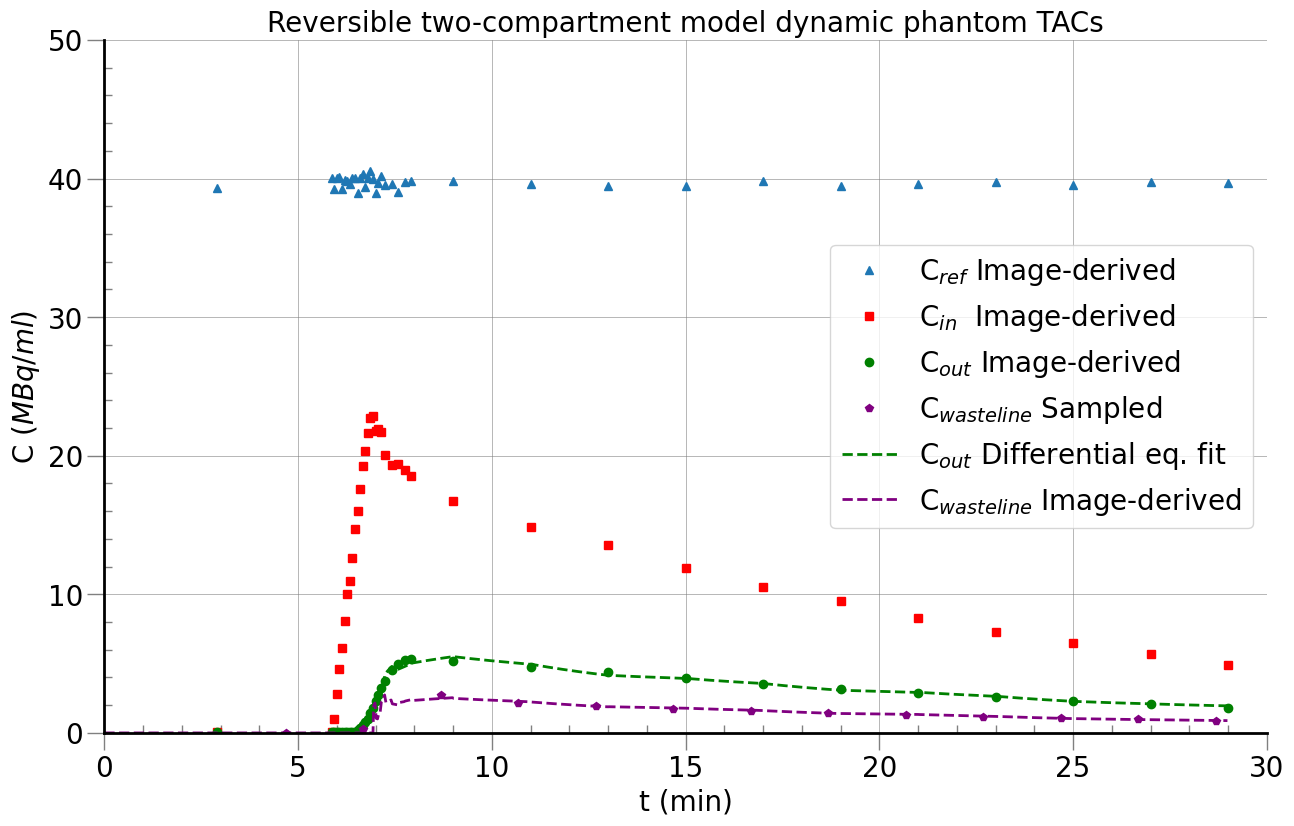

Fits ko1: 0.008199412166661988 s^-1 ko2: 0.0037464305900390465 s^-1


In [2]:
tpet=tpet2

Cpetin=Cpetin2
Cpetout=Cpetout2
Cpetref=Cpetref2

bins=bins2
q=q2
Cref=Cref2  #run5 is missing this

validationsample=validationsample2
sampleref=sampleref2
samplecount=samplecount2   #it could cause trouble that the last sampletimes are higher than the time array, then just increase the time

time=40           # it was actually 30min, here I just leave some extra room for the wastesamples we did after the acquisition ended. So that their time point won't be Nan 
window_size =60   # for sample time
stride =60        # for sample time
Vchamber=0.196
 
simulated=False
length=[10,4,10,60,120] #only needed for simulation or generating a new bin set
elements=[8,20,2,1,23]  #only needed for simulation or generating a new bin set
#########################################################################################################
""" For evaluating the noise level in the reference signal
Cpetreffit=np.average(Cpetref, weights=bins) #weighted
CpetreffitM = np.mean(Cpetref) #unweighted
std=np.std(Cpetref) #Uses unweighted mean
std_fun=standard_deviation(Cpetref[24:33], Cpetreffit) #Uses weighted mean
"""

t=np.linspace(0,60*time,60*time+1)  

generatedbins,binn,binstart=generatingbins(length,elements) # returns tpet_generated,bins_generated,binstart_generated
generatedbins=np.round(generatedbins).astype(int)

if simulated==True:
    startout=[615,3]
    simulatedin=riseandfall([615,20],0.29198130147541546,19.02027635880487,1508.279911175637,23.03816568969888) #0.29198130147541546 19.02027635880487 1508.279911175637 23.03816568969888
    tpet=[round(x) for x in generatedbins] # just making it integer
    startin=np.array([t[np.argmax(simulatedin)],0])   
    input_tac1=leaveinrf(Vchamber,q,simulatedin)
    #plt.plot(t,input_tac1,'-', color='purple')
    simulatedout=Num_conv(0.5/60,0.2/60)
    Cpetin,Cpetout=simulated_avg(simulatedin,simulatedout,0.01) #0.01 error, Change simulated_avg to simulated_ref if needed         

#Input fit
peakdelay=0        #by bins
startin=np.array([tpet[np.argmax(Cpetin)],Cpetin[np.argmax(Cpetin)]])
spline =UnivariateSpline(tpet[1:],Cpetin[1:],k=1, s=0) #k=2.5,s2
#spline =UnivariateSpline(tpet,Cpetin,k=3, s=2) #k1s0.7
CpetinfitS=spline(t)

        
for i in range(len(CpetinfitS)): #zero the CinS before and after the data
    if i<tpet[1] or i>tpet[-1]:
        CpetinfitS[i]=0

CleaveinS=leaveinrf(Vchamber,q,CpetinfitS)
CleaveinD=leaveindiscrete(Vchamber,q,bins,Cpetin)

#Output fit
startout=np.array([(tpet[np.argmax(Cpetin)+peakdelay]),Cpetout[np.argmax(Cpetin)+peakdelay]])
input_tac1=CleaveinS
params2, cv2 = curve_fit(Num_forfit, tpet[np.argmax(Cpetin)+peakdelay:None], Cpetout[np.argmax(Cpetin)+peakdelay:None], p0=(3/60,3/60),bounds=(0,0.1001))#, sigma=weight)
CpetoutfitS=Num_conv(params2[0], params2[1])
for i in range(len(CpetinfitS)): #zero the CoutS after the data
    if i>tpet[-1]:
        CpetoutfitS[i]=0
CleaveoutS=leaveoutrf(Vchamber,q,CpetinfitS,CpetoutfitS) 

tsamples= moving_average(t, window_size, stride,sampleref,samplecount)
Validationexpected = moving_average(CleaveoutS, window_size, stride,sampleref,samplecount)

fitsamplein=samplingthefit(CpetinfitS,tpet) #Sampling the fit at the times of bins so the accuracy of the fit could be calculated
fitsampleout=samplingthefit(CpetoutfitS,tpet)
fitsampleleaveout=samplingthefit(CleaveoutS,tsamples)

R2outfit=r2_score(Cpetout, fitsampleout)
R2leaveoutfit=r2_score(validationsample[2:-2], fitsampleleaveout[2:-2])  #Validationexpected or fitsampleleaveout. The range is changed so that it doesn't include when both are zero

# perform the fit for the falling edge 
starttime=np.argmax(Cpetin)+12  #arbitrary delay here
ki2, cv = curve_fit(monoExp2, tpet[starttime:None], Cpetin[starttime:None], (0.2/60))
Cinfitexp=monoExp2(tpet[starttime:None],ki2)

#Total leaving concentrations
#totalpulse= use the experimental setup
totalleavein=np.sum(CleaveinS)*(q/60)#*(window_size) #totall activity passed through accordiing to samples. It is just a good sanity check if we would have sampled continuously
totalleaveout=np.sum(CleaveoutS)*(q/60)#

retentionco=np.mean(CleaveoutS[int(startout[0])+1:tpet[-1]]/CpetoutfitS[int(startout[0])+1:tpet[-1]])
##############################################################################################
plt.figure(figsize=(15,9))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.linewidth'] = 2

plt.plot(tpet/60,Cpetref,'^',markersize=6, label='C$_{ref}$ Image-derived')  
plt.plot(tpet/60,Cpetin,'s',color='red',markersize=6, label='C$_{in}$  Image-derived')        
plt.plot(tpet/60,Cpetout,'o',color='green',markersize=6, label='C$_{out}$ Image-derived ')
plt.plot(tsamples/60,validationsample,'p',markersize=6, color='purple',label='C$_{waste line}$ Sampled') # skip for fig. 5
plt.plot(t[int(startout[0]):tpet[-1]+1]/60,CpetoutfitS[int(startout[0]):tpet[-1]+1],'--',linewidth=2,color='green',label='C$_{out}$ Differential eq. fit')
plt.plot(t[0:tpet[-1]]/60,CleaveoutS[0:tpet[-1]],'--',linewidth=2, color='purple',label='C$_{waste line}$ Image-derived') 


#plt.plot(tpet/60,Cpetref2f,'.',color='black',label='Max FOV')
#plt.plot(tpet/60,Cpetin2f,'.',color='black')        
#plt.plot(tpet/60,Cpetout2f,'.',color='black')

#plt.axhline(y=Cref, color='blue')
#plt.axhline(y=np.mean(Cpetref),linestyle='--', color='blue',label='C$_{ref}$ Mean')
#plt.plot(t,CpetinfitS,'--', color='red',label='Cin fit (spline)')
#plt.plot(t,CleaveinS,'-', color='orange',label='C$_P$ (Cleavein continuous)')
#plt.plot(tpet/60,CleaveinD,'o',color='orange',markersize=6,label='C$_P$ (Cleave in discrete)')
#plt.plot(tsamples,Validationexpected,'.',color='cyan',label='C$_{waste line}$ Image derived samples')
#plt.plot(tpet[starttime:None],Cinfitexp)
#plt.plot(t,simulatedin,'-', color='purple')
#plt.plot(t,simulatedout, color='orange')

afont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "DejaVu Sans" #"Times New Roman"  
plt.grid(True)
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.minorticks_on()
plt.tick_params(which='both', width=1)
plt.tick_params(which='major',labelsize=20, length=12, color='gray')
plt.tick_params(which='minor', length=6, direction='in', color='gray')
plt.ylim(0,50) #
plt.xlim(0,30)
plt.title('Reversible two-compartment model dynamic phantom TACs',fontsize="20")#,**afont) # ...(q=0.2ml/min) for fig. 5
plt.xlabel('t (min)',fontsize="20")
plt.ylabel('C $(MBq/ml)$',fontsize="20")
plt.legend(loc='center right',fontsize="20")
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.savefig('Delayed differential eq fit for reversible two-compartmental phantom Run 2.png',dpi=800) #.pdf
plt.show()


print('Fits ko1:',params2[0],'s^-1','ko2:',params2[1],'s^-1')
#print(R2outfit)
#print('R2leaveoutfit:',R2leaveoutfit)
#print('Input peak time:',int(startout[0]))
#print('total leavein and out',totalleavein,totalleaveout)
#print('Noise in reference signal:',Cpetreffit,std,std_fun)
#print('ki2',ki2)
#print("retentioncoefficient:",retentionco)
#print(generatedbins.tolist())
#print(CleaveinD.tolist())
#print(binn.tolist())
#spaceholder1=CpetoutfitS[tpet]
#print(spaceholder1.tolist())
#print(tsamples, samplecount)
#spaceholder2=CleaveoutS[tpet]
#print(spaceholder2.tolist())


### Logan plot

Slope (Vt=K1/k2+vB): 2.3619546647956295 Intercept: -175.92217562925134 



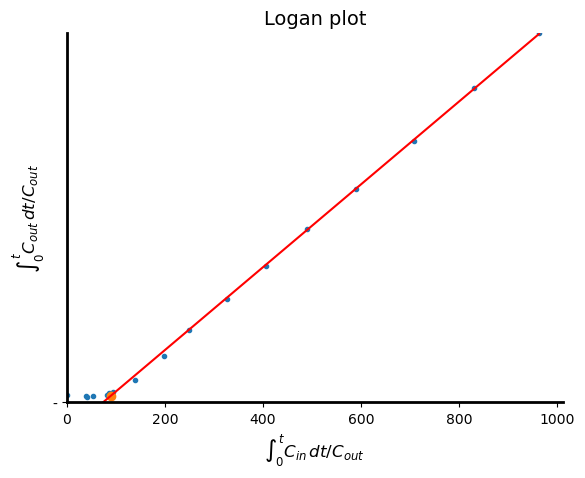

In [3]:
Cpetoutshifted=Cpetout      ## don't shift it shifting the output function, for similar reasons that it doesnt work for the diff fit  #-np.full(len(tpet),Cpetout[np.argmax(Cpetin)])
for i in range(len(Cpetoutshifted)):#Correcting for the already trapped tracer in Cout   
    if Cpetoutshifted[i]<0:
        Cpetoutshifted[i]=0
        
        
#Integral of Cleaevin
integralsC=np.zeros(len(CleaveinS))
for i in range(len(CleaveinS)):
    integralsC[i]=sum(CleaveinS[0:i])
    
#Discretising integrals
integrals=np.zeros(len(tpet))
for i in range(len(tpet)):
    integrals[i]=integralsC[tpet[i]]
    
#Integral of Cout
spline2 =UnivariateSpline(tpet[1:],Cpetoutshifted[1:],k=1, s=0) #tpet[1:] sclicing the first element might not be needed
CpetoutfitS=spline2(t)

integralsC2=np.zeros(len(CpetoutfitS))
for i in range(len(CpetoutfitS)):
    integralsC2[i]=sum(CpetoutfitS[0:i])
    
#Discretising integrals
integrals2=np.zeros(len(tpet))
for i in range(len(tpet)):
    integrals2[i]=integralsC2[tpet[i]]


lowlim=5 #make it at least 1
LoganX=integrals/Cpetoutshifted   #Cin
LoganY=integrals2/Cpetoutshifted  #Cout Ahh this supposed to be the continuous, but witouth fitting we dont have continuous
res = linregress(LoganX[np.argmax(Cpetin)+lowlim:-1],LoganY[np.argmax(Cpetin)+lowlim:-1]) 

plt.plot(LoganX[np.argmax(Cpetin):-1],LoganY[np.argmax(Cpetin):-1],'.')
plt.plot(LoganX[np.argmax(Cpetin)+lowlim],LoganY[np.argmax(Cpetin)+lowlim],'o')
plt.plot([0,LoganX[-2]],[res.intercept,res.intercept + res.slope*LoganX[-2]], 'r','-', label='fitted line')
plt.ylim(0,LoganY[-2])
plt.xlim(0,None)
plt.title('Logan plot' ,fontsize="14") 
plt.xlabel(r'$\int_0^t C_{in}\,dt/C_{out}$',fontsize="12")
plt.ylabel(r'$\int_0^t C_{out}\,dt/C_{out}$',fontsize="12")

print('Slope (Vt=K1/k2+vB):',res.slope,'Intercept:',res.intercept, '\n')
#print(integrals)
#print(Cpetoutshifted)
#print(LoganX[np.argmax(Cpetin)+1:-1],LoganY[np.argmax(Cpetin)+1:-1])
#print(tpet[np.argmax(Cpetin)+lowlim]/60)


### Checking what sampling rate is accurate for what k values (low sampling rate might not be fine enough for high k, especially needed in case of dispersion)

8.143809361256356
8.109984381121949
10
8.107360690463807
8.110322166660946


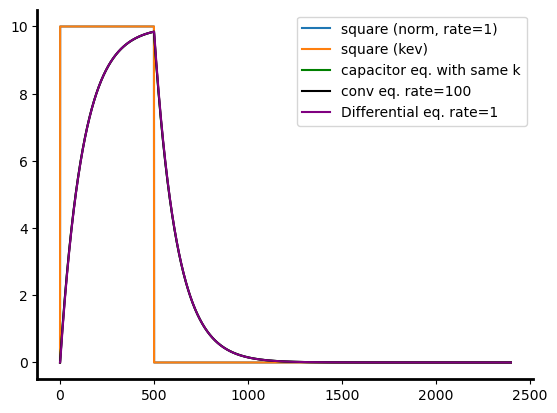

In [4]:
#Simulating datapoints
def input_fun2(x, l1,pulseend):
    return np.where((x > (0)) & (x <=pulseend), l1, 0)

timesamplerate=100

kevinido=np.linspace(0,60*time,timesamplerate*60*time+1)
#for i in range(len(kevinido)):
    
#3AC k1i 0.008342003203372476 k2i 0.0007102277445029245 k1o 0.034313589031347305 k2o 0.012470202617711751
tao1=0.00833 #0.034313589031347305 #smaller number means increased dispersion, 0.7 is good aproximation for no dispersion, but it can go higher just requires higher sampling rate too
#tao2=0.012470202617711751
     # 100sample/s is accurate till
tketto=500
squarefun=input_fun2(t,10,tketto)
kevinfun=input_fun2(kevinido,10,tketto)

input_tacketto=signal.convolve(squarefun,tao1*np.exp(-tao1*t))[:len(t)]  #normal 1s
kevin_tac=(1/timesamplerate)*signal.convolve(kevinfun,tao1*np.exp(-tao1*kevinido))[:len(kevinido)] #altered samplerate

capca0=np.zeros(len(t))     
           
for i in range(len(t)):                   
    if i>=0 and i<=(tketto):
        capca0[i]=10*(1-math.exp(-tao1*(i)))  
    if i>tketto:                         
        capca0[i]=capca0[tketto]*np.exp(-tao1*(i-tketto))
startout=[0,0]
input_tac1=squarefun
Differentialeq=Num_conv(tao1,tao1)

plt.plot(t,squarefun,label="square (norm, rate=1)")                   # (rate=1) the original square function that we should get with no dispersion
plt.plot(kevinido,kevinfun, label="square (kev)")                     # (timesamplerate=100) the original square function that we should get with no dispersion, but should be identical in shape to the rate=1 squarefun
plt.plot(t,capca0, label="capacitor eq. with same k", color='green')  # it is to prove the accuracy of the sample rate for varying k values and not just for high ones
#plt.plot(t,input_tacketto,label="rate=1 convolution")                # just to show what it would look like with 1sample/s time
plt.plot(kevinido,kevin_tac,label="conv eq. rate="+str(timesamplerate), color='black') # The actual convolution with the timesample rate that accurcay we would like to check
plt.plot(t,Differentialeq, label='Differential eq. rate=1', color='purple')
plt.legend()



print(input_tacketto[200])
print(capca0[200])
print(squarefun[200])
print(Differentialeq[200])
print(kevin_tac[int(200*timesamplerate)])

### Bar graphs summarising the results

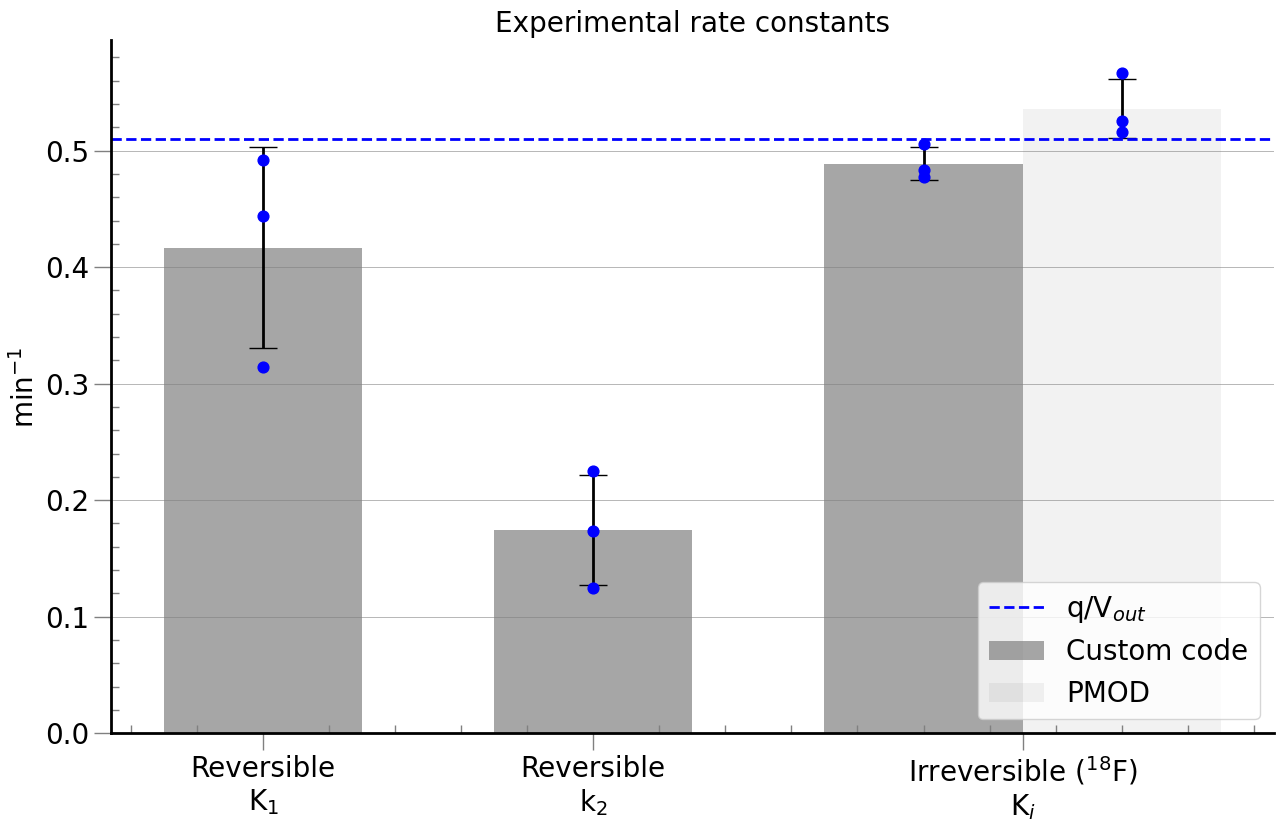

Means: 0.5360096733333334
Stander Error of the Means: 0.025242485881107227


In [5]:
# Sample data
categories = ['Reversible\nK$_{1}$', 'Reversible\nk$_{2}$','Irreversible ($^{18}$F)\nK$_{i}$']#,'Irreversible ($^{11}$C)\nK']

# Scatter data for each category
#min fov
individual_data1 = [[0.49196473,0.444061504,0.314555922], #[[0.008199412*60,0.007401025*60,0.005242599*60], # these two are equal to eachother reversible experimental k1   0.005242599
                   [0.003746431*60,0.00288582*60,0.00207369682115502*60], #reversible experimental k2
                   [0.483407399,0.505502936,0.477723266] #irreversible experimental (V=0.196)
                   ]  #extra ideas experimental one generated with noise (the point of this would be to show with this noise what kind of spread we would receive), physiological one generated with noise

#max fov
individual_data2 = [[0.008485415*60,0.00799393*60,0.005786956*60],
                    [0.003877796*60,0.003125369*60,0.002218478*60],
                    [0.007027381*60,0.005883968*60,0.006732219*60]# #(V=0.196)
                    ]

Pmod_Al=[0.00875316666666667*60,0.009441667*60,0.00860565*60] #(this one was done with Vchamber=0.2ml) 0.00875316666666667




# Sample data
means1 = [np.mean(individual_data1[i]) for i in range(len(individual_data1))]
SEM1 = [np.std(individual_data1[i]) / np.sqrt(len(individual_data1[i])) for i in range(len(individual_data1))]
SEM1 = [x * 2 for x in SEM1]

means2 = [np.mean(individual_data2[i]) for i in range(len(individual_data2))]
SEM2 = [np.std(individual_data2[i])/np.sqrt(len(individual_data2[i])) for i in range(len(individual_data2))] #Standard error of the mean
SEM2 = [x * 2 for x in SEM2]

means3 =np.mean(Pmod_Al)
SEM3 = 2*np.std(Pmod_Al)/np.sqrt(len(Pmod_Al)) #Standard error of the mean (2 sigma)



# Define the width of each bar
bar_width = 0.6

# Set the positions of the bars on the x-axis
x = np.arange(len(categories))

# Plotting
plt.figure(figsize=(15,9))
plt.rcParams["font.family"] = "DejaVu Sans" #"Times New Roman"  
#plt.grid(axis='y')
plt.grid(axis='y', color='gray', linestyle='-', linewidth=0.4)
plt.minorticks_on()
plt.tick_params(which='both', width=1)
plt.tick_params(which='major',labelsize=20, length=12, color='gray')
plt.tick_params(which='minor', length=6, direction='in', color='gray')
error_kw = {'elinewidth': 2, 'capsize': 10}

#without Max fov
plt.bar(x, means1,yerr=SEM1, color='grey',width=bar_width, label='Custom code',alpha=0.7,error_kw=error_kw)
plt.bar(2 + bar_width, means3,yerr=SEM3, color='grey',width=bar_width, label='PMOD',alpha=0.1,error_kw=error_kw)

#With max fov
#plt.bar(x - bar_width/2, means1,yerr=SEM1, color='grey',width=bar_width, label='Min. FOV',alpha=0.7,error_kw=error_kw)
#plt.bar(x + bar_width/2, means2,yerr=SEM2, color='lavender',width=bar_width, label='Max. FOV',alpha=1,error_kw=error_kw)
#plt.bar(2 + bar_width*3/2, means3,yerr=SEM3, color='grey',width=bar_width, label='Pmod Min. FOV',alpha=0.1,error_kw=error_kw)

for i, category in enumerate(categories):
    plt.scatter([x[i]]*len(individual_data1[i]), individual_data1[i],marker='o',s=60, color='blue', zorder=3)
    #plt.scatter([x[i] + bar_width/2]*len(individual_data2[i]), individual_data2[i],marker='o',s=60, color='blue', zorder=3)
    #plt.errorbar(x[i] - bar_width/2, np.mean(scatter_values_group1[i]), yerr=np.std(scatter_values_group1[i]), fmt='none', ecolor='black', capsize=5)
    #plt.errorbar(x[i] + bar_width/2, np.mean(scatter_values_group2[i]), yerr=np.std(scatter_values_group2[i]), fmt='none', ecolor='black', capsize=5)

plt.scatter([2 + bar_width]*len(Pmod_Al), Pmod_Al,marker='o',s=60, color='blue', zorder=3)


plt.axhline(y=0.1/0.196,linestyle='--',linewidth=2, color='blue',label='q/V$_{out}$')


plt.ylabel('min$^{-1}$',size=20)
plt.title('Experimental rate constants',fontsize="20")  #'Experimental and Generated k values'')
plt.xticks([0,1,2+bar_width/2], categories)
plt.legend(loc='lower right',fontsize="20")
plt.savefig('Experimental rate constants.png',dpi=800) #saving plot

plt.show()
print('Means:',means3)
print('Stander Error of the Means:',SEM3)
